In [52]:
import pandas as pd

# Load the dataset (Excel file)
file_path = "Sleep_health_and_lifestyle_dataset.csv.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse('Sleep_health_and_lifestyle_data')

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the DataFrame
print(df_cleaned)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
5            6    Male   28     Software Engineer             5.9   
6            7    Male   29               Teacher             6.3   
16          17  Female   29                 Nurse             6.5   
17          18    Male   29                Doctor             6.0   
18          19  Female   29                 Nurse             6.5   
30          31  Female   30                 Nurse             6.4   
31          32  Female   30                 Nurse             6.4   
49          50    Male   31                Doctor             7.7   
67          68    Male   33                Doctor             6.0   
80          81  Female   34             Scientist             5.8   
81          82  Female   34             Scientist             5.8   
93          94    Male   35       

In [30]:
# Drop any rows with missing values
df_cleaned = df.dropna()

# Show shape before and after
print("Original shape:", df.shape)
print("After dropping nulls:", df_cleaned.shape)


Original shape: (374, 13)
After dropping nulls: (155, 13)


In [32]:
# Check if we have at least 100 valid entries
assert df_cleaned.shape[0] >= 100, "Dataset has fewer than 100 data points after cleaning."
print(f"✅ Dataset is clean and has {df_cleaned.shape[0]} rows.")


✅ Dataset is clean and has 155 rows.


In [34]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

for col in ['Sleep Duration', 'Heart Rate', 'Physical Activity Level']:
    df_cleaned = remove_outliers(df_cleaned, col)

print("Shape after outlier removal:", df_cleaned.shape)


Shape after outlier removal: (153, 13)


In [36]:
import numpy as np

sleep_array = df_cleaned['Sleep Duration'].values

print("Mean Sleep Duration:", np.mean(sleep_array))
print("Median Sleep Duration:", np.median(sleep_array))
print("Standard Deviation:", np.std(sleep_array))
print("Maximum Sleep Duration:", np.max(sleep_array))
print("Minimum Sleep Duration:", np.min(sleep_array))


Mean Sleep Duration: 6.795424836601308
Median Sleep Duration: 6.5
Standard Deviation: 0.761778094503574
Maximum Sleep Duration: 8.3
Minimum Sleep Duration: 5.8


In [38]:
from scipy import stats

activity = df_cleaned['Physical Activity Level'].values
sleep = df_cleaned['Sleep Duration'].values

corr1, pval1 = stats.pearsonr(activity, sleep)
print(f"Correlation between Activity & Sleep: r = {corr1:.3f}, p = {pval1:.3f}")


Correlation between Activity & Sleep: r = 0.221, p = 0.006


In [40]:
import statsmodels.api as sm

X = sm.add_constant(df_cleaned['Physical Activity Level'])  # add constant for intercept
y = df_cleaned['Sleep Duration']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Sleep Duration   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.769
Date:                Sat, 24 May 2025   Prob (F-statistic):            0.00600
Time:                        10:17:00   Log-Likelihood:                -171.63
No. Observations:                 153   AIC:                             347.3
Df Residuals:                     151   BIC:                             353.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

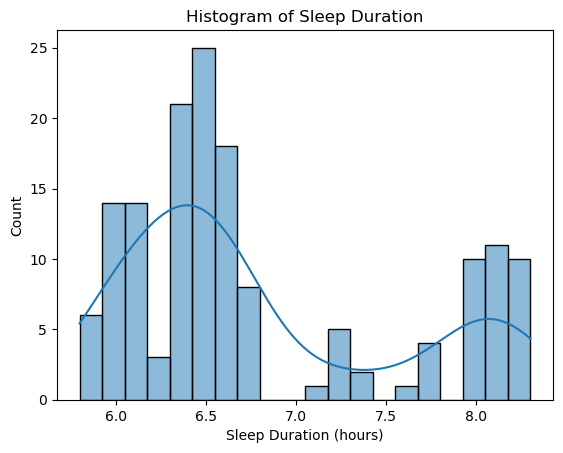

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['Sleep Duration'], bins=20, kde=True)
plt.title("Histogram of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.show()


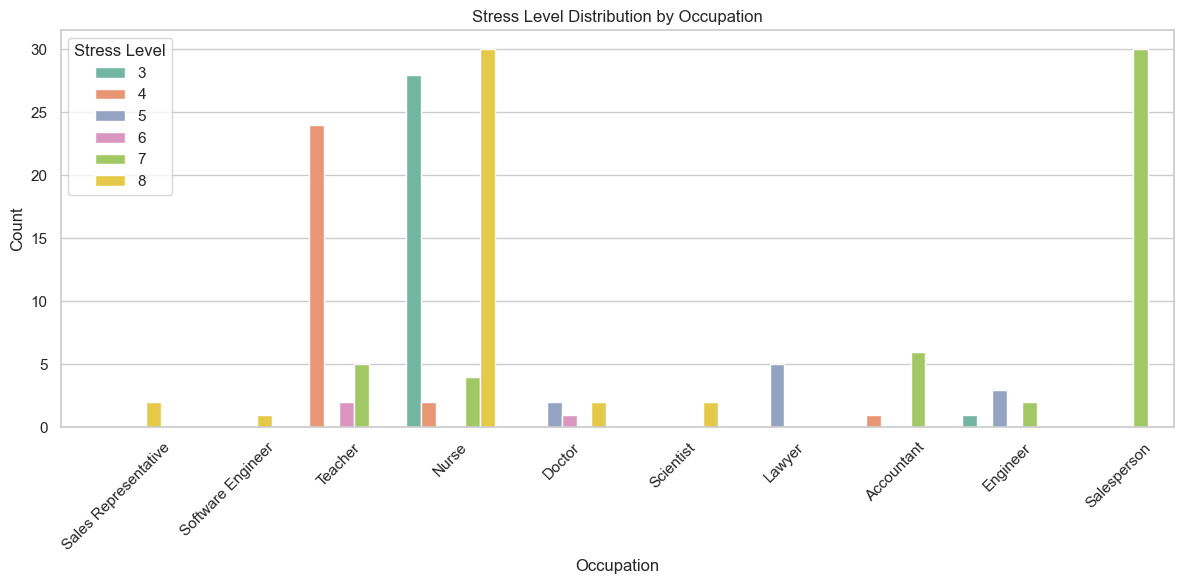

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x="Occupation", hue="Stress Level", palette="Set2")
plt.title("Stress Level Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



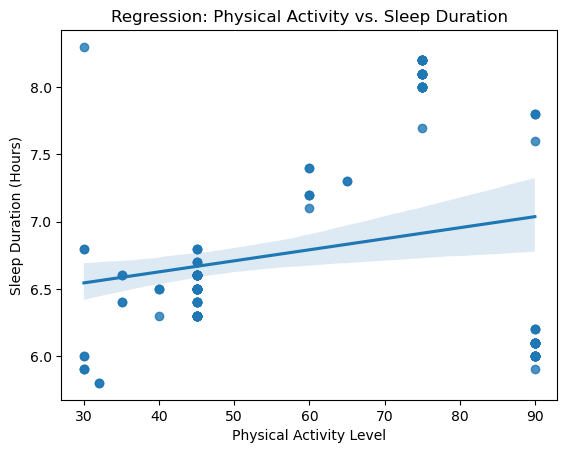

In [46]:
sns.regplot(x='Physical Activity Level', y='Sleep Duration', data=df_cleaned)
plt.title("Regression: Physical Activity vs. Sleep Duration")
plt.xlabel("Physical Activity Level")
plt.ylabel("Sleep Duration (Hours)")
plt.show()
